In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import scipy
import scipy.stats as stats
import seaborn.apionly as sns
import statsmodels.api as sm
import theano.tensor as tt
import pymc3
from sklearn import preprocessing

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', 
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

messages = pd.read_csv('../data/random/hangout_chat_data.csv')

X = messages[['is_weekend','day_of_week','message_length','num_participants']].values
_, num_X = X.shape

with pm.Model() as model:       
    intercept = pm.Normal('intercept', mu=0, sd=100)
    beta_message_length = pm.Normal('beta_message_length', mu=0, sd=100)
    beta_is_weekend = pm.Normal('beta_is_weekend', mu=0, sd=100)
    beta_num_participants = pm.Normal('beta_num_participants', mu=0, sd=100)
    
    mu = tt.exp(intercept 
                + beta_message_length*messages.message_length 
                + beta_is_weekend*messages.is_weekend
                + beta_num_participants*messages.num_participants)
    
    y_est = pm.Poisson('y_est', mu=mu, observed=messages['time_delay_seconds'].values)
    
    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(200000, step, start=start, progressbar=True)

         Current function value: 2236.721141


100%|██████████| 200500/200500 [01:50<00:00, 1813.18it/s]

         Iterations: 16
         Function evaluations: 146
         Gradient evaluations: 133


In [29]:
from scipy.special import factorial

In [80]:
import random
r = 1.2
random_nums=range(1000)
frac_pois = [(k**(r))*np.exp(-k)/factorial(k) for k in random_nums]

In [72]:
frac_pois.append(1-np.sum(frac_pois))

In [81]:
frac_pois

[0.0,
 0.36787944117144233,
 0.1554594172269548,
 0.031010645729300571,
 0.0040279384007574021,
 0.00038735605549965825,
 2.9558481037765922e-05,
 1.8690707379270042e-06,
 1.0088616320574415e-07,
 4.7498253534145661e-09,
 1.9828604392299089e-10,
 7.4349183455652612e-12,
 2.5301527919887321e-13,
 7.8817642684192471e-15,
 2.2637191464044481e-16,
 6.0310464202171211e-18,
 1.4983479395151492e-19,
 3.4870967583116126e-21,
 7.632825110807589e-23,
 1.5769377281432428e-24,
 3.0847625505159477e-26,
 5.7297427281903769e-28,
 1.0131226450081383e-29,
 1.709251190243926e-31,
 2.757276086202618e-33,
 4.2610858478076434e-35,
 6.3196417751391888e-37,
 9.0095420094315902e-39,
 1.2365261977695756e-40,
 1.6360584003283955e-42,
 2.0895413683233967e-44,
 2.5791899320164887e-46,
 3.0802417709265564e-48,
 3.5629779780801912e-50,
 3.995744512901872e-52,
 4.3485266726110018e-54,
 4.5964919439468105e-56,
 4.7229066892073382e-58,
 4.7209514458809242e-60,
 4.5941763030762271e-62,
 4.3555965517097914e-64,
 4.02566

In [256]:
import os
import binascii
mystr=str(binascii.b2a_hex(os.urandom(15)))
codes = [str(binascii.b2a_hex(os.urandom(15))).upper()[2:8] for c in range(372)]

In [260]:
df_busy = pd.read_csv('../data/airport_data/busydata.csv')

In [273]:
cols_to_keep = ['Rank','Locid','S/L','Hub','CY 16 Enplanements','CY 15 Enplanements','% Change']
df_busy[cols_to_keep].to_csv('../data/airport_data/airport_business.tsv',sep='\t',index=False)

In [272]:
df_busy.head()

,Rank,RO,ST,Locid,City,Airport Name,S/L,Hub,CY 16 Enplanements,CY 15 Enplanements,% Change
0,1,SO,GA,ATL,Atlanta,Hartsfield - Jackson Atlanta International,P,L,50476272.0,49340732.0,2.30
1,2,WP,CA,LAX,Los Angeles,Los Angeles International,P,L,39635691.0,36351272.0,9.04
2,3,GL,IL,ORD,Chicago,Chicago O'Hare International,P,L,37499201.0,36305668.0,3.29
3,4,SW,TX,DFW,Fort Worth,Dallas-Fort Worth International,P,L,31274875.0,31589839.0,-1.00
4,5,EA,NY,JFK,New York,John F Kennedy International,P,L,29224554.0,27782369.0,5.19


In [271]:
import re
df_busy['CY 16 Enplanements']=df_busy['CY 16 Enplanements'].apply(lambda x : re.sub(",","",x)).astype(float)
df_busy['CY 15 Enplanements']=df_busy['CY 15 Enplanements'].apply(lambda x : re.sub(",","",x)).astype(float)
df_busy['% Change']=df_busy['% Change'].apply(lambda x : re.sub("%","",re.sub(",","",x))).astype(float)

In [257]:
df = pd.DataFrame({'codes':codes[0:6]})

In [259]:
df.to_csv('/Users/dgoldma1/Documents/leah.csv',index=False)

In [87]:
sample= [np.random.choice(np.arange(0,1000), p=frac_pois) for s in range(1000)]

ValueError: probabilities do not sum to 1

In [88]:
np.sum(frac_pois)

0.55879633197770107

In [84]:
len(frac_pois)

1000

In [86]:
len(np.arange(0,1001))

1001

# Poisson regression testing

In [95]:

%pylab inline
import numpy as np
import scipy as sp
from scipy import stats
import pylab as pb

Populating the interactive namespace from numpy and matplotlib


 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning:pylab import has clobbered these variables: ['step', 'random', 'trace', 'sample', 'colors']
`%matplotlib` prevents importing * from pylab and numpy


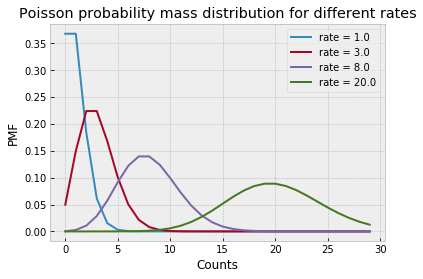

In [96]:
K = np.arange(0, 30, 1)[:, None]
rates = np.arange(0, 40, 1)[:, None]

#Make a matrix with PMF for (rate x count) combinations
rates_count = np.array([sp.stats.poisson(r).pmf(K) for r in rates]).reshape(rates.shape[0], K.shape[0])

rates_plot = [1,3,8,20]

#Plot each rate as a function of counts K
for r in rates_plot:
    pb.plot(K, rates_count[r, :], label='rate = {}'.format(float(rates[r])))

pb.title('Poisson probability mass distribution for different rates')
pb.ylabel('PMF')
pb.xlabel('Counts')
pb.legend()

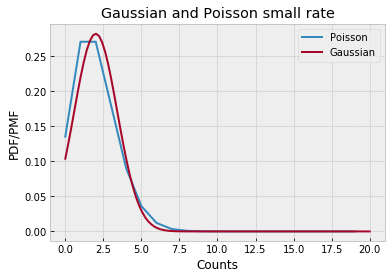

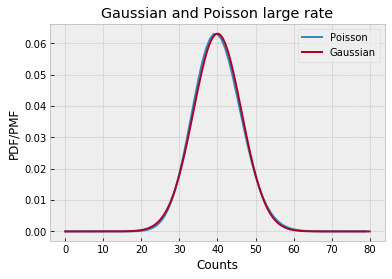

In [97]:

small_rate = 2
K = np.arange(0, 20, 1)[:, None]
Kcont = np.linspace(0, 20, 100)[:, None]
gauss20 = sp.stats.norm(loc=small_rate, scale=np.sqrt(small_rate)).pdf(Kcont)
poisson20 = sp.stats.poisson(small_rate).pmf(K)
pb.plot(K, poisson20, label='Poisson')
pb.plot(Kcont, gauss20, label='Gaussian')
pb.title('Gaussian and Poisson small rate')
pb.ylabel('PDF/PMF')
pb.xlabel('Counts')
pb.legend()

pb.figure()
large_rate = 40
K = np.arange(0, 80, 1)[:, None]
Kcont = np.linspace(0, 80, 200)[:, None]
gauss40 = sp.stats.norm(loc=large_rate, scale=np.sqrt(large_rate)).pdf(Kcont)
poisson40 = sp.stats.poisson(large_rate).pmf(K)
pb.plot(K, poisson40, label='Poisson')
pb.plot(Kcont, gauss40, label='Gaussian')
pb.title('Gaussian and Poisson large rate')
pb.ylabel('PDF/PMF')
pb.xlabel('Counts')
pb.legend()

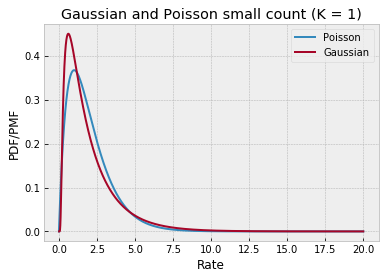

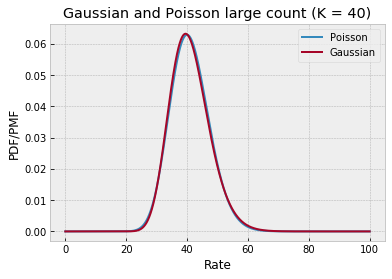

In [98]:
rates = np.arange(0, 20, 0.01)[:, None]
small_counts = 1
gauss3 = sp.stats.norm(loc=rates, scale=np.sqrt(rates)).pdf(small_counts)
#gauss3 = np.array([sp.stats.norm(loc=r, scale=np.sqrt(r)).pdf(small_counts) for r in rates])
poisson3 = sp.stats.poisson(rates).pmf(small_counts)
pb.plot(rates, poisson3, label='Poisson')
pb.plot(rates, gauss3, label='Gaussian')
pb.title('Gaussian and Poisson small count (K = {})'.format(small_counts))
pb.ylabel('PDF/PMF')
pb.xlabel('Rate')
pb.legend()

pb.figure()
rates = np.arange(0, 100, 0.01)[:, None]
large_counts = 40
gauss40 = sp.stats.norm(loc=rates, scale=np.sqrt(rates)).pdf(large_counts)
poisson40 = sp.stats.poisson(rates).pmf(large_counts)
pb.plot(rates, poisson40, label='Poisson')
pb.plot(rates, gauss40, label='Gaussian')
pb.title('Gaussian and Poisson large count (K = {})'.format(large_counts))
pb.ylabel('PDF/PMF')
pb.xlabel('Rate')
pb.legend()

In [116]:
Y

array([[ 3,  2,  3,  0,  2,  2,  4,  0,  6,  6,  3,  5,  5,  7,  5,  4, 11,
         7,  3,  7,  2,  4,  1,  2,  3,  3,  2,  5,  2,  4,  5,  5,  2,  4,
        11,  7,  8,  6, 10,  4,  1,  5,  4,  2,  2,  4,  0,  1]])


Name : gp
Objective : 123.72009876018822
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


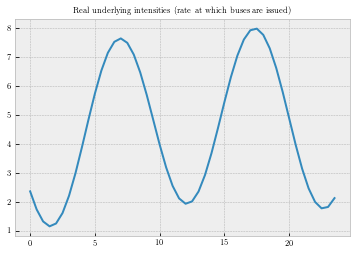

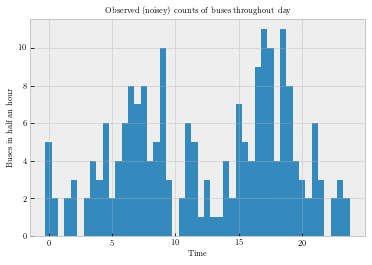

 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


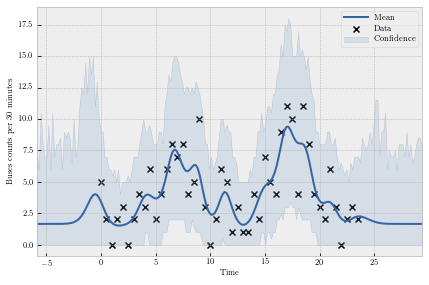

In [232]:
import GPy


X = np.linspace(0,23.50,48)[:, None]
intensities = 4 + 3*np.sin(10 + 0.6*X) + np.sin(0.1*X)
pb.plot(X, intensities)
pb.title('Real underlying intensities (rate at which buses are issued)')

Y = np.array([[sp.random.poisson(intensity) for intensity in intensities]]).T
#Y=Y[0]
pb.figure()
pb.bar(X, Y[0], width=0.5)
pb.xlabel('Time')
pb.ylabel('Buses in half an hour')
pb.title('Observed (noisey) counts of buses throughout day')


kernel = GPy.kern.RBF(1, variance=1.0, lengthscale=1.0)
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()



m = GPy.core.GP(X=X, Y=Y[0], likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m)

#Predictions of counts of buses, including noise arising from Poisson noise
m.plot()
pb.xlabel('Time')
pb.ylabel('Buses counts per 30 minutes')

In [228]:
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()


Name : gp
Objective : 122.78827358654986
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |  value  |  constraints  |  priors
  rbf.variance     |    1.0  |      +ve      |        
  rbf.lengthscale  |    1.0  |      +ve      |        


 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


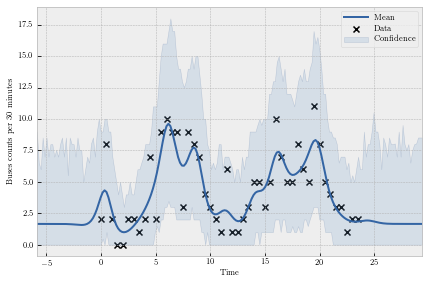

In [231]:
m = GPy.core.GP(X=X, Y=Y[0], likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m)

#Predictions of counts of buses, including noise arising from Poisson noise
m.plot()
pb.xlabel('Time')
pb.ylabel('Buses counts per 30 minutes')


Name : gp
Objective : 129.32843405762455
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |          value  |  constraints  |  priors
  rbf.variance     |  2.27648611976  |      +ve      |        
  rbf.lengthscale  |  1970.03845942  |      +ve      |        


 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


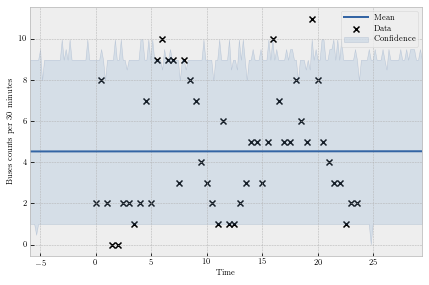

In [226]:
m = GPy.core.GP(X=X,Y=Y[0], likelihood=poisson_likelihood, inference_method=laplace_inf, kernel=kernel)
print (m)

#Predictions of counts of buses, including noise arising from Poisson noise
m.plot()
pb.xlabel('Time')
pb.ylabel('Buses counts per 30 minutes')


Name : gp
Objective : 129.32843405762455
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |          value  |  constraints  |  priors
  rbf.variance     |  2.27648611976  |      +ve      |        
  rbf.lengthscale  |  1970.03845942  |      +ve      |        


 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


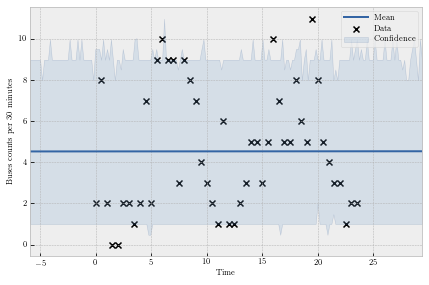

In [224]:
m.optimize()
print (m)

#Predictions of counts of buses, including noise arising from Poisson noise
m.plot()
pb.xlabel('Time')
pb.ylabel('Buses counts per 30 minutes')

In [113]:
Y.shape

(48,)

In [100]:
import GPy
kernel = GPy.kern.RBF(1, variance=1.0, lengthscale=1.0)

In [90]:
import GPy
kernel = GPy.kern.RBF(1, variance=1.0, lengthscale=1.0)

In [102]:
poisson_likelihood = GPy.likelihoods.Poisson()
laplace_inf = GPy.inference.latent_function_inference.Laplace()

In [156]:
X.shape

(126, 2)

 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2649: UserWarning:Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'


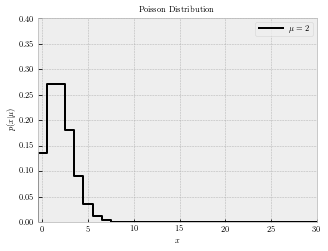

In [198]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import poisson
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu_values = [2] #5, 15]
linestyles = ['-', '--', ':']

#------------------------------------------------------------
# plot the distributions
#   we generate it using scipy.stats.poisson().  Once the distribution
#   object is created, we have many options: for example
#   - dist.pmf(x) evaluates the probability mass function in the case of
#     discrete distributions.
#   - dist.pdf(x) evaluates the probability density function for
#   evaluates
fig, ax = plt.subplots(figsize=(5, 3.75))

for mu, ls in zip(mu_values, linestyles):
    # create a poisson distribution
    # we could generate a random sample from this distribution using, e.g.
    #   rand = dist.rvs(1000)
    dist = poisson(mu)
    x = np.arange(-1, 200)

    plt.plot(x, dist.pmf(x), ls=ls, color='black',
             label=r'$\mu=%i$' % mu, linestyle='steps-mid')

plt.xlim(-0.5, 30)
plt.ylim(0, 0.4)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu)$')
plt.title('Poisson Distribution')

plt.legend()
plt.show()

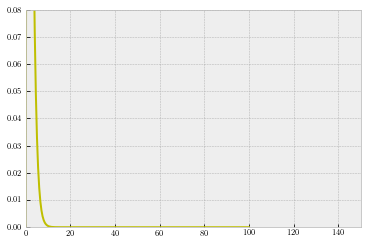

In [208]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt

x = np.linspace (0, 100, 200) 
y1 = stats.gamma.pdf(x, a=2, loc=0.001) #a is alpha, loc is beta???
plt.plot(x, y1, "y-", label=(r'$\alpha=29, \beta=3$')) 


plt.ylim([0,0.08])
plt.xlim([0,150])
plt.show()

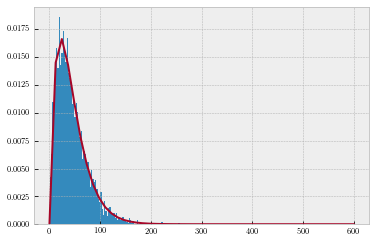

In [214]:
import scipy.stats as ss
import numpy as np
import matplotlib.pyplot as plt
alpha, loc, beta=2,0, 22
data=ss.gamma.rvs(alpha,loc=loc,scale=beta,size=5000)
myHist = plt.hist(data, 100, normed=True)
rv = ss.gamma(alpha,loc,beta)
x = np.linspace(0,600) 
h = plt.plot(x, rv.pdf(x), lw=2)
plt.show()

In [216]:
ts

NameError: name 'ts' is not defined

 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning:The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.


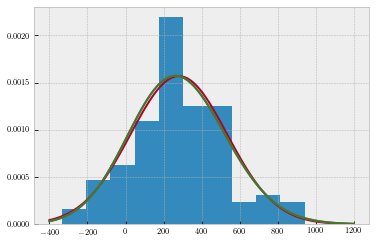

In [215]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt

# create some normal random noisy data
ser = 50*np.random.rand() * np.random.normal(10, 10, 100) + 20

# plot normed histogram
plt.hist(ser, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(ser))

# lets try the normal distribution first
m, s = stats.norm.fit(ser) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

# exactly same as above
ag,bg,cg = stats.gamma.fit(ser)  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma")

# guess what :) 
ab,bb,cb,db = stats.beta.fit(ser)  
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta")

plt.show() 

In [188]:
from scipy.stats import poisson

mu = 0.6
mean, var, skew, kurt = poisson.stats(mu, moments='mvsk')

AssertionError: 

In [181]:
m.log_likelihood()

-881.13884615687459

RuntimeError: Can only plot density in one input dimension

 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


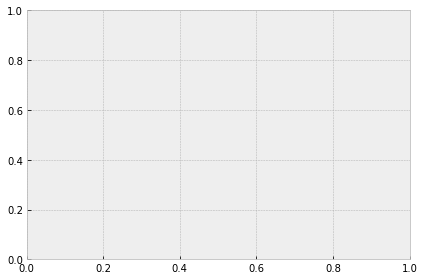

In [183]:
m.plot_density()


Name : gp
Objective : 881.1388461568746
Number of Parameters : 2
Number of Optimization Parameters : 2
Updates : True
Parameters:
  gp.              |          value  |  constraints  |  priors
  rbf.variance     |  8.94018518082  |      +ve      |        
  rbf.lengthscale  |  109.446096143  |      +ve      |        


 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


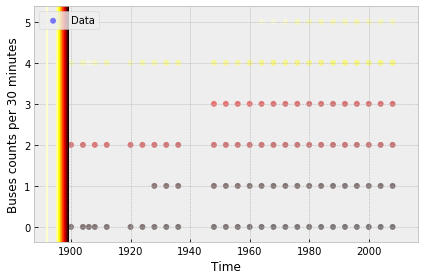

In [162]:
m.optimize()
print (m)

#Predictions of counts of buses, including noise arising from Poisson noise
m.plot()
pb.xlabel('Time')
pb.ylabel('Buses counts per 30 minutes')

In [167]:
y[:,0]

array([ 12.  ,  11.  ,  11.  ,  11.2 ,  10.8 ,  10.8 ,  10.8 ,  10.6 ,
        10.8 ,  10.3 ,  10.3 ,  10.3 ,  10.4 ,  10.5 ,  10.2 ,  10.  ,
         9.95,  10.14,  10.06,  10.25,   9.99,   9.92,   9.96,   9.84,
         9.87,   9.85,   9.69,  12.2 ,  11.9 ,  11.5 ,  11.9 ,  11.5 ,
        11.5 ,  11.  ,  11.4 ,  11.  ,  11.07,  11.08,  11.06,  10.97,
        10.54,  10.82,  10.94,  11.12,  10.93,  10.78,  22.2 ,  21.6 ,
        22.6 ,  21.7 ,  22.  ,  21.6 ,  21.8 ,  21.2 ,  20.7 ,  21.1 ,
        20.7 ,  20.6 ,  20.5 ,  20.3 ,  19.8 ,  20.  ,  20.23,  20.19,
        19.8 ,  19.75,  20.01,  19.32,  20.09,  19.79,  19.3 ,  24.4 ,
        23.7 ,  23.4 ,  24.  ,  23.  ,  22.5 ,  22.4 ,  22.37,  22.03,
        21.81,  21.34,  21.81,  22.12,  22.27,  22.05,  21.74,  54.2 ,
        49.4 ,  49.2 ,  53.2 ,  50.  ,  48.2 ,  49.6 ,  47.6 ,  47.8 ,
        46.2 ,  46.5 ,  46.2 ,  45.9 ,  46.7 ,  44.9 ,  45.1 ,  43.8 ,
        44.66,  44.26,  44.6 ,  44.27,  43.87,  43.5 ,  43.49,  43.84,
      

ValueError: x and y must have same first dimension, but have shapes (126, 2) and (48, 1)

 /Users/dgoldma1/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning:This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.


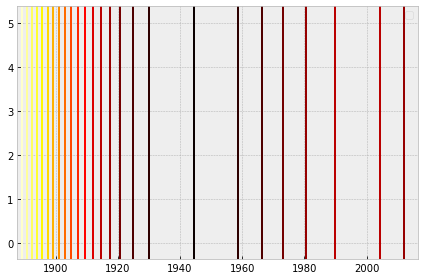

In [164]:

#Posterior distribution of the intensity of buses, and true intensity in red
m.plot_f()
pb.plot(X, np.log(intensities), '--r', linewidth=2)
pb.title('Real log intensity vs posterior belief')
pb.xlabel('Time')
pb.ylabel('Log intensity')
plt.ylim(-2,3)

In [123]:
X.ndim

2

In [122]:
Y.ndim

3

In [75]:
df = pd.DataFrame({'frac_pois':sample})

In [79]:
df.groupby('frac_pois').size()

frac_pois
1       371
2       152
3        28
4         9
1000    440
dtype: int64

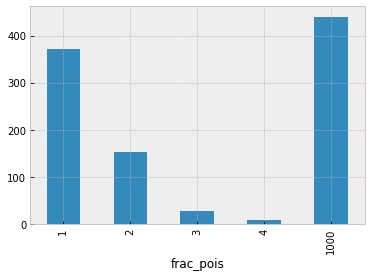

In [78]:
df.groupby('frac_pois').size().plot(kind='bar')

In [22]:
pm.forecast()

AttributeError: module 'pymc3' has no attribute 'forecast'

In [14]:
messages

,conversation_id,event_id,timestamp,sender,message_length,num_participants,message_type,prev_timestamp,prev_sender,time_delay_seconds,time_delay_mins,day_of_week,year_month,is_weekend
0,Ugw5Xrm3ZO5mzAfKB7V4AaABAQ,7-H0Z7-FkyB7-HDBYj4KKh,2014-08-15 03:44:12.840015,Mark Regan,14,3,TEXT,2014-08-15 03:44:00.781653,Keir Alexander,12.0,1.0,4,2014-08,0
1,UgwLUkm5oqPrUyjqFlR4AaABAQ,85SWvmXIEV285Sb1E65xL0,2015-10-18 09:36:39.438706,Mark Regan,47,4,TEXT,2015-10-18 09:36:10.932367,Louise Regan,28.0,1.0,6,2015-10,1
2,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-H1JJEmE5K,2013-12-19 02:49:28.552063,Mark Regan,44,2,TEXT,2013-12-19 02:48:50.916592,Daragh Walsh,37.0,1.0,3,2013-12,0
3,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-H1NQV6lMv,2013-12-19 02:50:02.249113,Mark Regan,29,2,TEXT,2013-12-19 02:49:50.401824,Daragh Walsh,11.0,1.0,3,2013-12,0
4,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-H1RPd1OTh,2013-12-19 02:50:34.906922,Mark Regan,102,2,TEXT,2013-12-19 02:50:11.427353,Daragh Walsh,23.0,1.0,3,2013-12,0
5,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-H1XZ3YFlF,2013-12-19 02:51:25.266040,Mark Regan,15,2,TEXT,2013-12-19 02:51:14.914502,Daragh Walsh,10.0,1.0,3,2013-12,0
6,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-HeFtekGdS,2013-12-19 08:38:32.093829,Mark Regan,12,2,TEXT,2013-12-19 08:37:42.776099,Daragh Walsh,49.0,1.0,3,2013-12,0
7,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-HkgoerKmK,2013-12-19 09:34:46.557615,Mark Regan,11,2,TEXT,2013-12-19 09:33:57.581618,Daragh Walsh,48.0,1.0,3,2013-12,0
8,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-HmF3bv7-r,2013-12-19 09:48:19.607480,Mark Regan,21,2,TEXT,2013-12-19 09:47:56.069556,Daragh Walsh,23.0,1.0,3,2013-12,0
9,UgwUBKMcZgFowQTz1Rt4AaABAQ,7-H0Z7-HQQg7-HmI0BKWsU,2013-12-19 09:48:43.744465,Mark Regan,98,2,TEXT,2013-12-19 09:48:27.417805,Daragh Walsh,16.0,1.0,3,2013-12,0


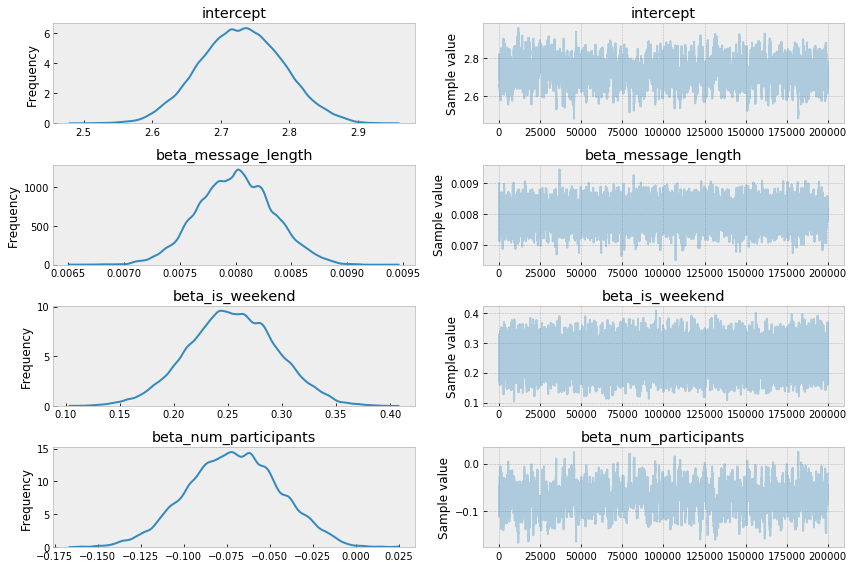

In [12]:
_ = pm.traceplot(trace)

In [20]:
# Predict using model

start_pos = max(result.k_ar, result.k_ma)

fit = []
for t in range(start_pos, len(data)):
    value = 0
    for i in range(1, result.k_ar + 1):
        value += result.arparams[i - 1] * data[t - i]
    for i in range(1, result.k_ma + 1):
        value += result.maparams[i - 1] * data[t - i]
    fit.append(value)

# Plot

plt.figure(facecolor='white')
plt.title('ARMA Model Fitted Using ' + str(INPUT_DATA_POINT) + ' Data Points, P=' + str(P) +  ' Q=' + str(Q) + '\n')
plt.plot(data, 'b-', label='data')
plt.plot(range(INPUT_DATA_POINT), result.fittedvalues, 'r+', label='fit')
plt.plot(range(start_pos, len(data)), fit, 'r-', label='predict')
plt.legend(loc=4)
plt.show()

NameError: name 'result' is not defined